## 知識情報学 第2回演習サンプルプログラム ex2.ipynb
- Programmed by Wu Hongle, 監修　福井健一
- Last update: 2018/09/14
- Checked with Python 3.8.8, scikit-learn 1.0
- MIT License

## k近傍法による分類と識別面のプロット

In [1]:
# %matplotlib inline
from sklearn import datasets
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import itertools

### データの読み込みと標準化
- 【課題2】近傍数kを変更してみましょう．
- 【課題3】使用する特徴量(d1,d2)を変更してみましょう．

In [24]:
# K近傍法の近傍数パラメータ k
neighbors = 5
# テストデータ分割のための乱数のシード（整数値）
random_seed = 1
#　テストデータの割合
test_proportion = 0.3
# Iris データセットをロード 
iris = datasets.load_iris()
# 使用する特徴の次元を(Irisの場合は0,1,2,3から)2つ指定．d1とd2は異なる次元を指定すること
d1 = 0
d2 = 1
# d1,d2列目の特徴量を使用 
X = iris.data[:, [d1, d2]]
# クラスラベルを取得
y = iris.target
# z標準化
X_std = scale(X)

### 課題1(a) データを学習データとテストデータに分割
- train_test_split()を使用し，変数test_proportionの割合をテストデータとし，変数random_seedを乱数生成器の状態に設定
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=test_proportion, random_state=random_seed)

### 課題1(b) クラスKNeighborsClassifierを使用してk近傍法のインスタンスを生成
- 近傍数kは上で指定したneighborsを使用

In [26]:
knn = KNeighborsClassifier(n_neighbors=neighbors)

### k近傍法のモデルに学習データを適合

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### 正答率の算出

In [28]:
acc_train = accuracy_score(y_train, knn.predict(X_train))
acc_test  = accuracy_score(y_test, knn.predict(X_test))
print('k=%d, features=(%d,%d)' % (neighbors, d1, d2))
print('accuracy for training data: %f' % acc_train)
print('accuracy for test data: %f' % acc_test)

k=5, features=(0,1)
accuracy for training data: 0.847619
accuracy for test data: 0.688889


### 識別境界面をプロットする関数
各格子点に対してk近傍法で識別を行い，識別結果に応じて色を付けている

In [29]:
def plot_decision_boundary(test_accuracy_score=None):
    x1_min, x1_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    x2_min, x2_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
                       
    Z = knn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    title = f'k={neighbors}, features=({d1},{d2})'
    if test_accuracy_score is not None:
        title += f' accuracy={test_accuracy_score:.3f}'
    fig.suptitle(title)

    for i, (X_data, y_data) in enumerate(zip([X_train, X_test], [y_train, y_test])):
        ax[i].contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap)
        ax[i].set_xlim(xx1.min(), xx1.max())
        ax[i].set_ylim(xx2.min(), xx2.max())

        for idx, cl in enumerate(np.unique(y)):
            ax[i].scatter(x=X_data[y_data == cl, 0],
                          y=X_data[y_data == cl, 1],
                          alpha=0.8,
                          c=colors[idx],
                          marker=markers[idx],
                          label=cl)
        
        ax[i].legend(loc='upper left')
        ax[i].set_xlabel('feature %d' % d1)
        ax[i].set_ylabel('feature %d' % d2)
    plt.tight_layout()


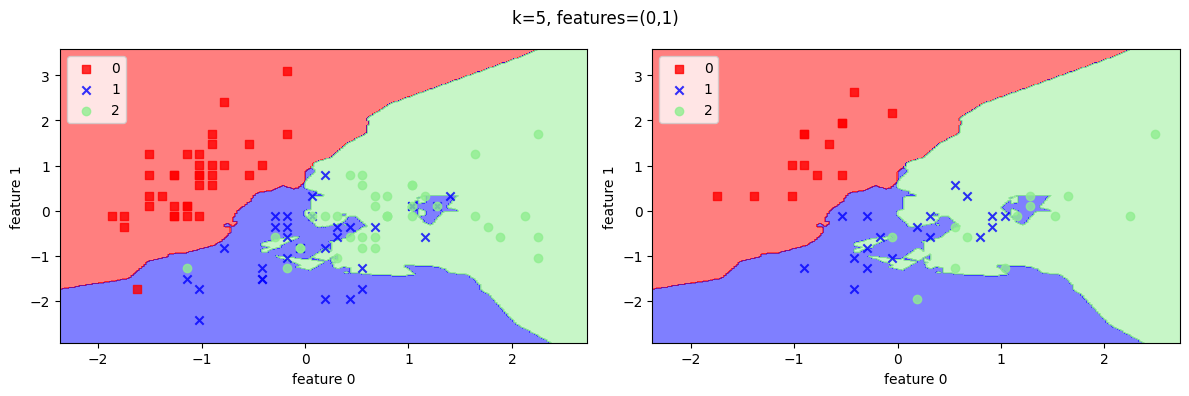

In [30]:
plot_decision_boundary()

### 【課題2】近傍数kを変更してみましょう．

- n_neighborsを3から29まで動かしながらtrain_dataとtest_dataのaccuracyをプロットするとともに、n_neighbors=3, 9, 15, 29の場合について識別境界面を描画した。n_neighbors=9, 11あたりで最も良いaccuracyが得られた。
- n_neighborsが小さい場合はtrainデータのaccuracyは高くtrainデータにfitしていることが分かるが、testデータでのaccuracyは非常に低く、いわゆる過学習を起こしていると見られる。n_neighbors=3の識別境界面はギザギザと非常に細かく複雑な形になっており、バリアンスが高くなっていることが窺える。
- n_neighborsを11から増やしていくと、testのaccuracyは低下した。比較的遠い点も推論に使用するようになったことで、局所的な境界面を作れなくなったためだと思われる。n_neighbors=29での識別境界面は滑らかだかバイアスが大きくなっている。

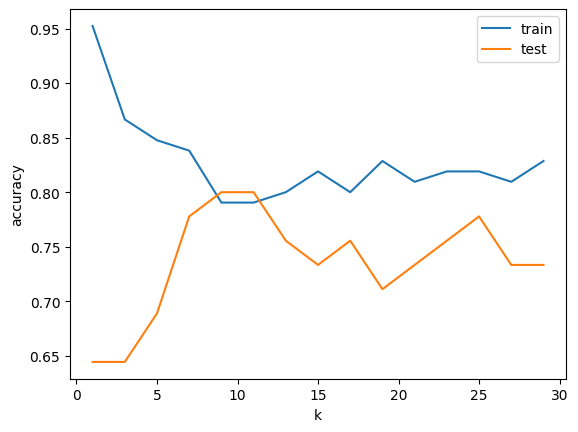

In [9]:
k_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
acc_train_list = []
acc_test_list = []
for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    acc_train = accuracy_score(y_train, knn.predict(X_train))
    acc_test  = accuracy_score(y_test, knn.predict(X_test))
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)

plt.plot(k_list, acc_train_list, label='train')
plt.plot(k_list, acc_test_list, label='test')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend()
    

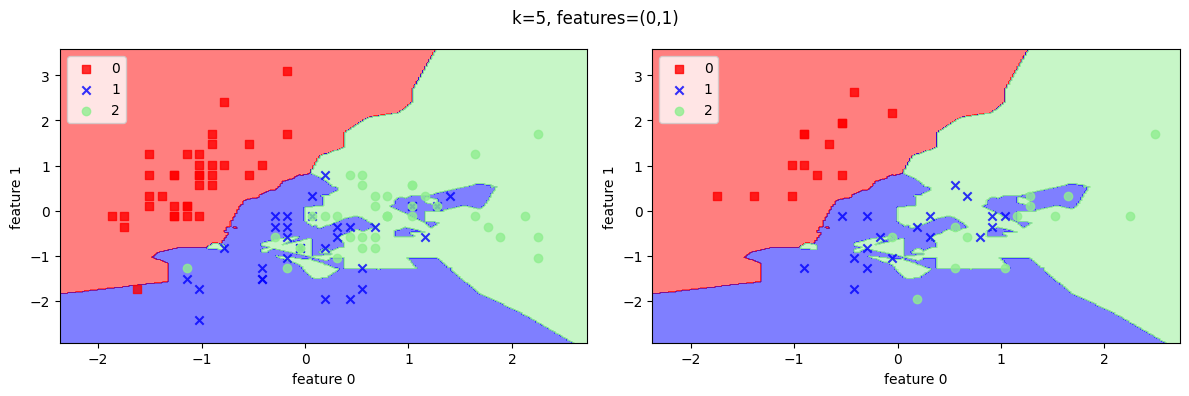

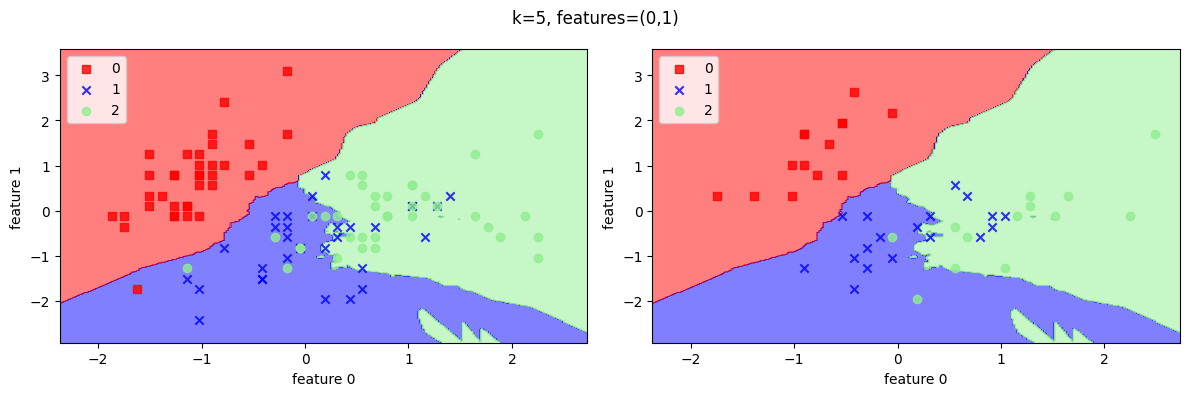

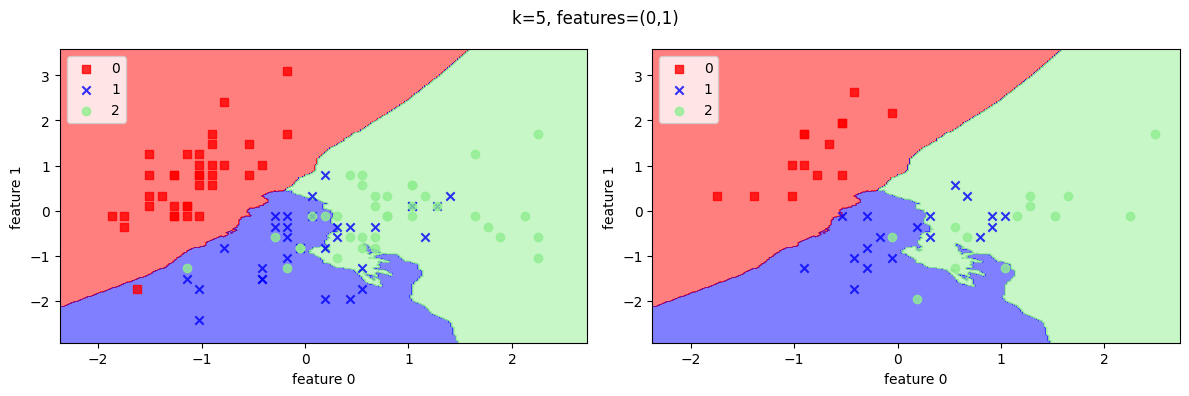

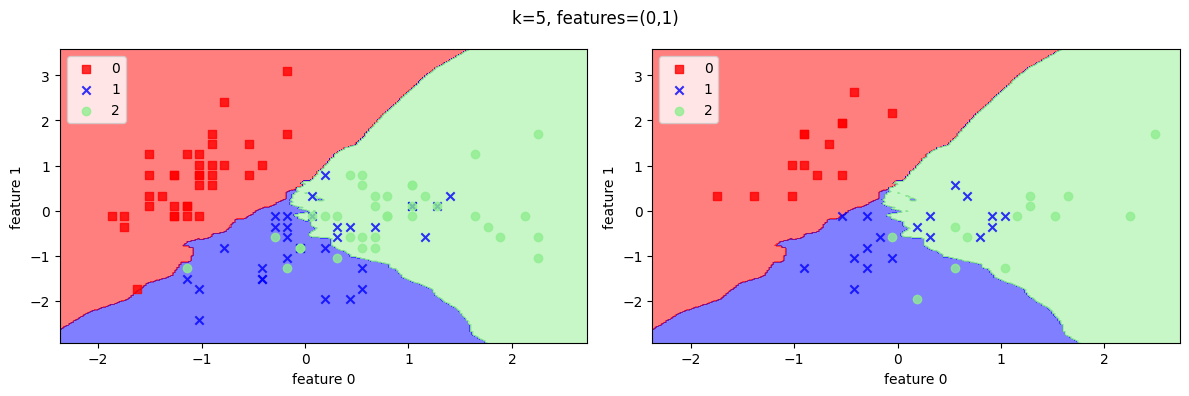

In [31]:
k_list = [3, 9, 15, 29]
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plot_decision_boundary()

### 【課題3】使用する特徴量(d1,d2)を変更してみましょう．

- n_neighbors=9で固定し、使用する特徴量を変更した。全ての特徴量の組み合わせについてaccuracyを計算するとともに識別境界面を可視化した。また書く組み合わせのaccuracyをグリッド形式で可視化した。
- sepal lengthとpetal lengthの組み合わせで最も高いaccuracy（0.978）を記録した。
- sepal lengthとsepal widthの組み合わせ以外の組み合わせは、どれも分離境界面が定義しやすいデータ分布となっており、accuracyが高くなった。
- 各データ点のプロットを観察すると、petal lengthとpetal widthの組み合わせの場合、同じラベルのデータがかなり近い距離に集中していることが見てとれた。petal（=花弁）の特徴量が、同じ花の種類において似た値を持っている、ということは非常に納得感がある。あやめの花に詳しい人であれば、最初から花弁の特徴量を使用すべきだと分かっている可能性が高く、機械学習におけるドメイン知識の重要性を感じた。

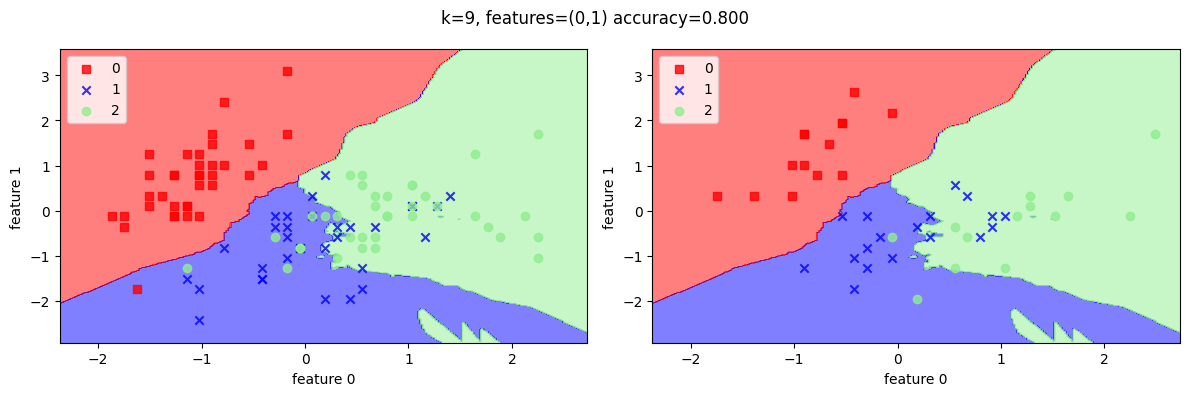

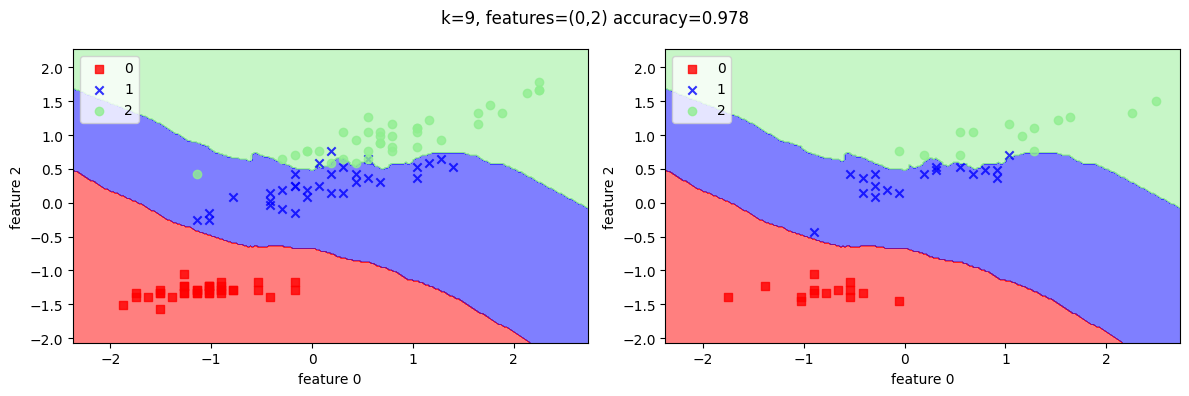

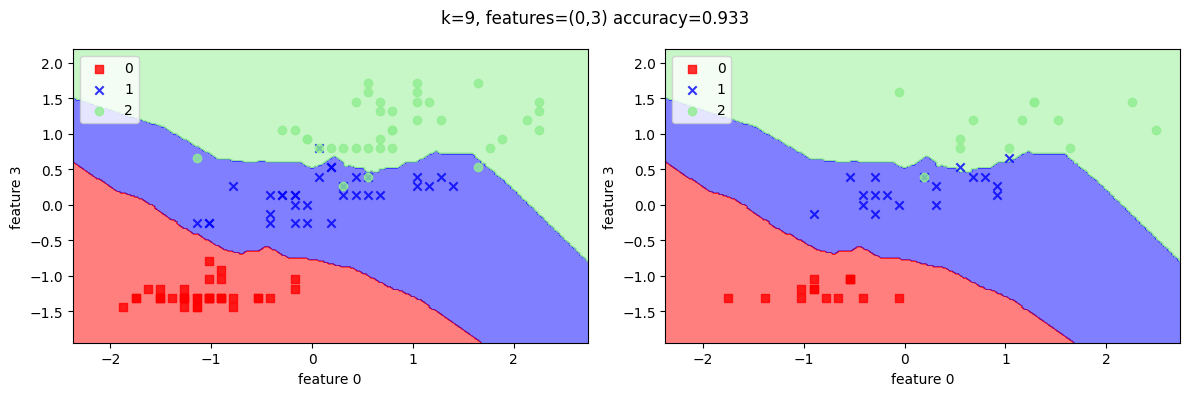

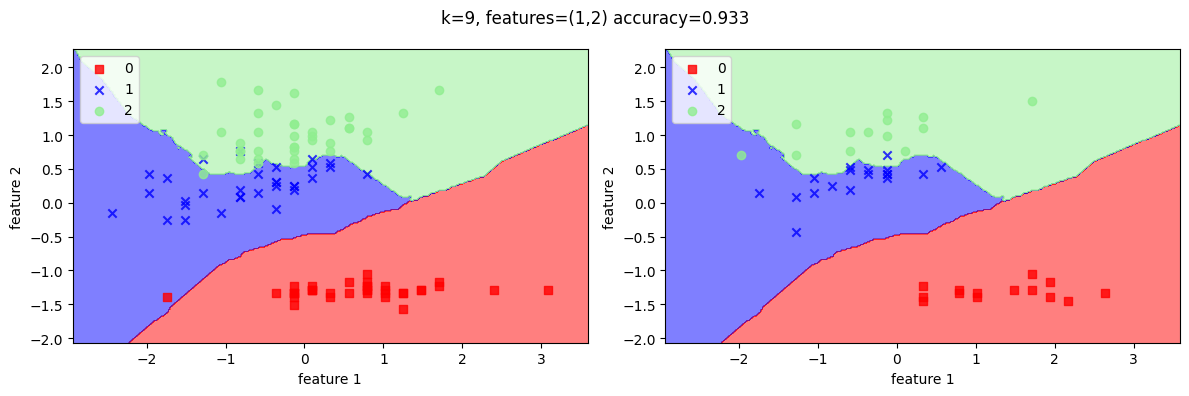

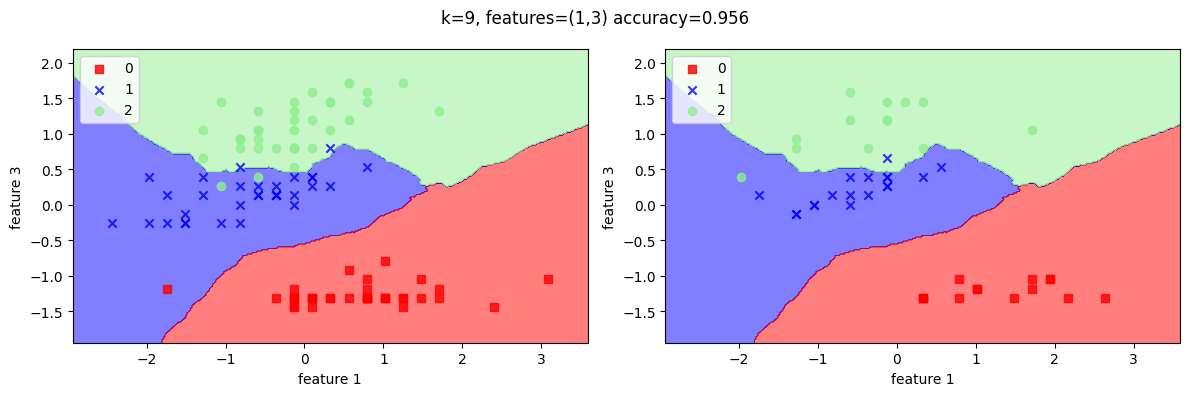

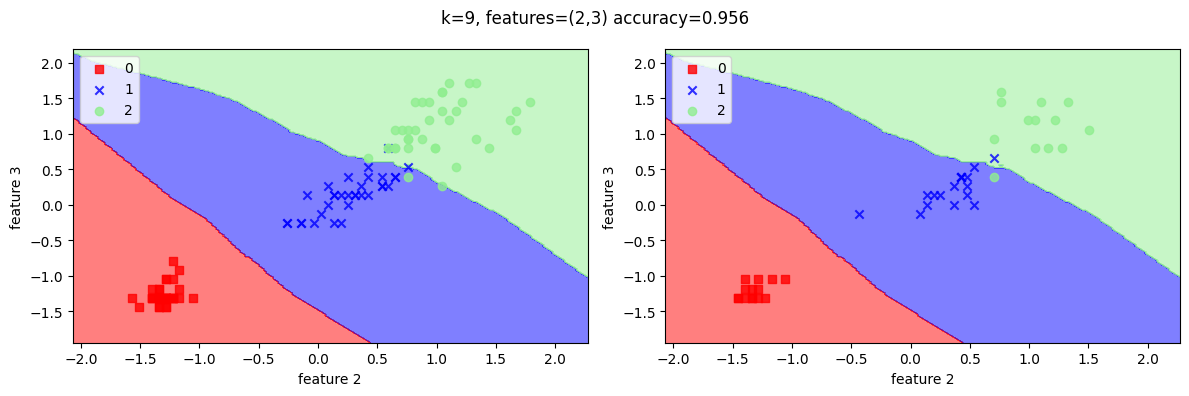

In [22]:
neighbors = 9
acc_train_list = []
acc_test_list = []

feature_indecies = list(itertools.combinations([0, 1, 2, 3], 2))
for feature_index in feature_indecies:
    d1, d2 = feature_index
    X = iris.data[:, [d1, d2]]
    y = iris.target
    X_std = scale(X)
    X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=test_proportion, random_state=random_seed)
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train)
    acc_train = accuracy_score(y_train, knn.predict(X_train))
    acc_test  = accuracy_score(y_test, knn.predict(X_test))
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)
    plot_decision_boundary(test_accuracy_score=acc_test)

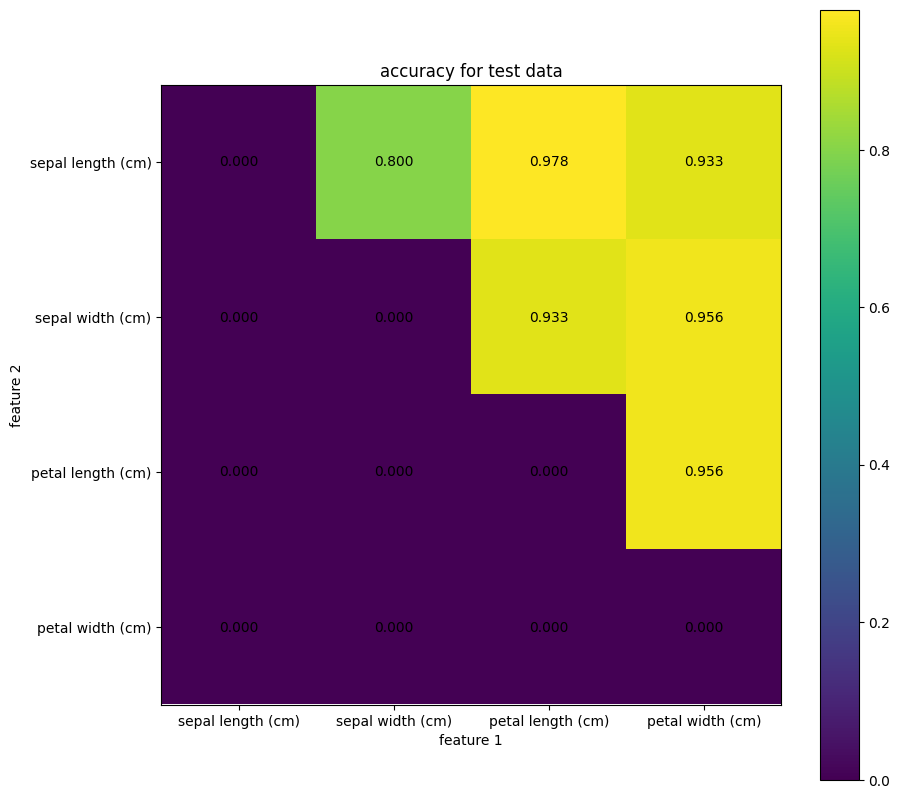

In [23]:
acc_test_grid = np.zeros((4, 4))
for i, feature_index in enumerate(feature_indecies):
    d1, d2 = feature_index
    acc_test_grid[d1, d2] = acc_test_list[i]

plt.figure(figsize=(10, 10))
plt.imshow(acc_test_grid, interpolation='nearest')
for i in range(4):
    for j in range(4):
        plt.text(j, i, '%.3f' % acc_test_grid[i, j], ha='center', va='center', color='black')
plt.colorbar()
plt.xticks(np.arange(4), iris.feature_names)
plt.yticks(np.arange(4), iris.feature_names)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('accuracy for test data')
plt.show()

### その他-1
識別境界面をプロットする関数 plot_decision_boundary を改造した。
- プロットを横並びに表示するようにし、異なるパラメータによるプロットを上下で比較しやすくした
- 使用したパラメータをタイトルとして表示するようにした
- 任意でタイトルにaccuracyを表示できるようにした
- プロット時にループを用いてプログラムの可読性を改善した

### その他-2
全ての特徴量を用いたkNNを実装した。
- 全ての特徴量を用いても、最適な特徴量２つだけを使用した場合とaccuracyは大きく変わらなかった

In [35]:
neighbors = 9
random_seed = 1
test_proportion = 0.3
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_std = scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=test_proportion, random_state=random_seed)
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)

acc_train = accuracy_score(y_train, knn.predict(X_train))
acc_test  = accuracy_score(y_test, knn.predict(X_test))
print('k=%d, features=(%d,%d)' % (neighbors, d1, d2))
print('accuracy for training data: %f' % acc_train)
print('accuracy for test data: %f' % acc_test)


k=9, features=(0,1)
accuracy for training data: 0.952381
accuracy for test data: 0.955556
